---
title: "QTM350 Assignment 5"
author: "Harris Wang"
date: "2024-10-05"
format: 
  html: default
  pdf:
    fig-width: 3
    fig-height: 2
    margins: 2in
bibliography: sources_hw5.bib
---



## Load Data


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('wdi.csv')



## Exploratory Analysis

For the exploratory analysis, I visualized the distributions of various countries for the 3 variables in discussion: Inflation Rate, GDP Growth, and Life Expectancy. The data all come from the worldbank dataset. [World Development Indicators](wdi.csv)



### Inflation Rate



The first graph presents a histogram showing the distribution of inflation rates across different countries. As observed in the figure titled Distribution of Inflation Rate, most countries experience an inflation rate concentrated in the lower percentiles, with a few outliers exhibiting exceptionally high inflation rates. This distribution is heavily right-skewed, indicating that while inflation is generally kept in check in most economies, there are some countries that experience inflationary spikes.

The descriptive statistics further highlight this imbalance. The mean inflation rate is modest, but the standard deviation is large, emphasizing the significant variation between countries. Policymakers can use these insights to assess macroeconomic stability globally and identify regions prone to inflationary pressure.


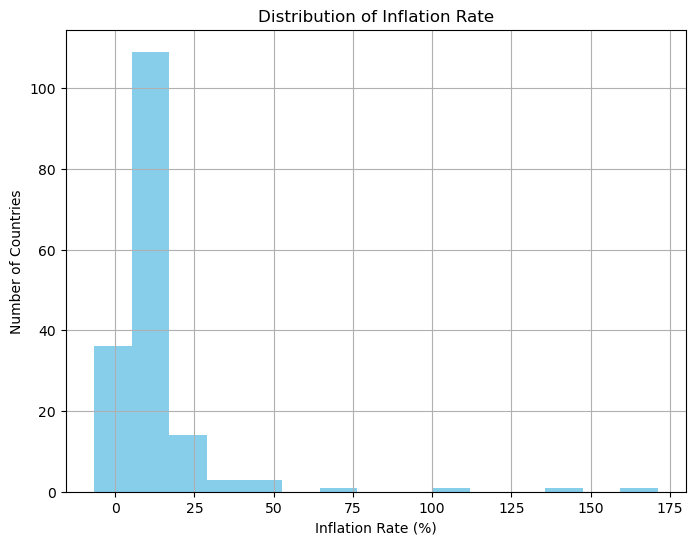

In [2]:
#| echo: true
#| eval: true
#| label: inf_plot
#| fig-cap: "Graphical descriptive summary of inflation data distribution of the countries"
plt.figure(figsize=(8, 6))
data['inflation_rate'].hist(bins=15, color='skyblue')
plt.title('Distribution of Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Number of Countries')
plt.savefig('inflation_rate.png')
plt.show()

inflation_stats=data['inflation_rate'].describe()



### GDP Growth Rate

The second visualization in the notebook shows the Distribution of GDP Growth Rate for various countries. Unlike the inflation distribution, the GDP growth rates are relatively more balanced, with most countries falling within a typical range. The majority of countries have GDP growth rates hovering around 1-3%, which is a sign of moderate economic expansion, a healthy target for many economies.

However, as with inflation, there are a few countries that stand out due to exceptionally high GDP growth rates. These outliers could represent nations undergoing rapid industrialization or recovering from economic downturns. The graph provides a useful lens for analysts aiming to forecast future global economic trends and identify emerging markets with potential for investment.

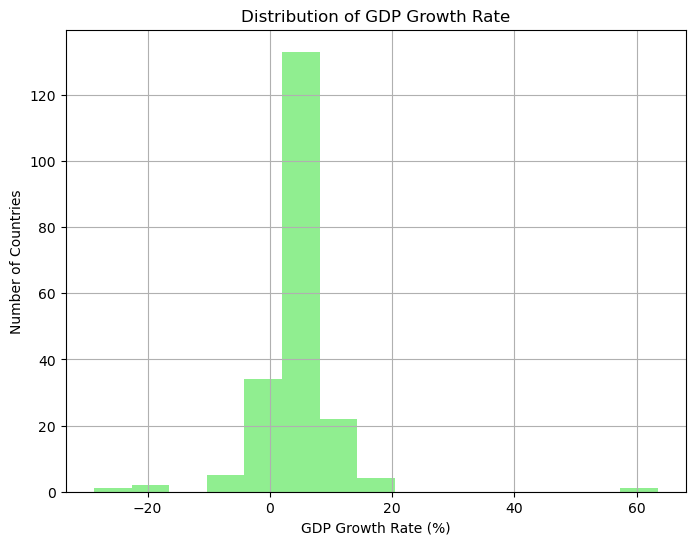

In [3]:
#| echo: true
#| eval: true
#| label: GDP_plot
#| fig-cap: "Graphical descriptive summary of GDP growth rate data distribution of the countries"
plt.figure(figsize=(8, 6))
data['gdp_growth_rate'].hist(bins=15, color='lightgreen')
plt.title('Distribution of GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Number of Countries')
plt.savefig('gdp_growth_rate.png')
plt.show()

gdp_growth_stats=data['gdp_growth_rate'].describe()



### Life Expectancy


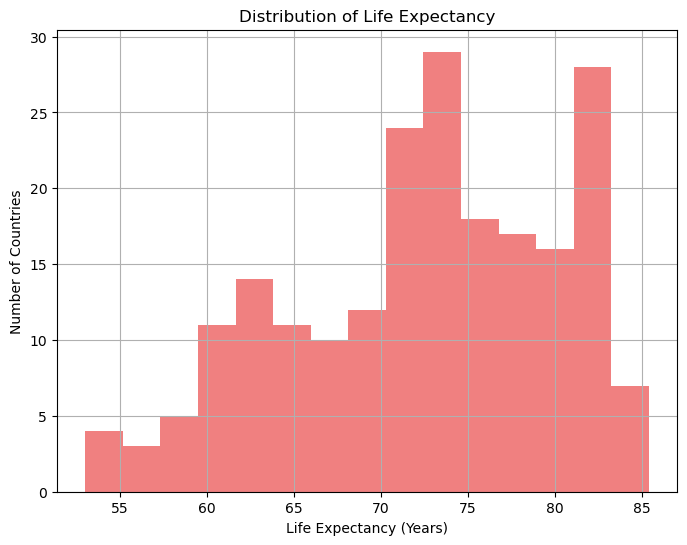

In [4]:
#| echo: true
#| eval: true
#| label: life_plot
#| fig-cap: "Graphical descriptive summary of life expectancy data distribution of the countries"
plt.figure(figsize=(8, 6))
data['life_expectancy'].hist(bins=15, color='lightcoral')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Number of Countries')
plt.savefig('life_expectancy.png')
plt.show()

life_expectancy_stats=data['life_expectancy'].describe()



## Indicator Relational Analysis



### Life Expectancy and GDP Growth Rate

The relationship between life expectancy and economic growth is a widely explored topic in development economics. According to Bloom, Canning, and Sevilla (2004),[@BLOOM20041] improvements in health and life expectancy are directly linked to labor productivity, human capital formation, and long-term economic growth. They argue that countries with higher life expectancies tend to have healthier workforces, which contributes to sustained economic development.

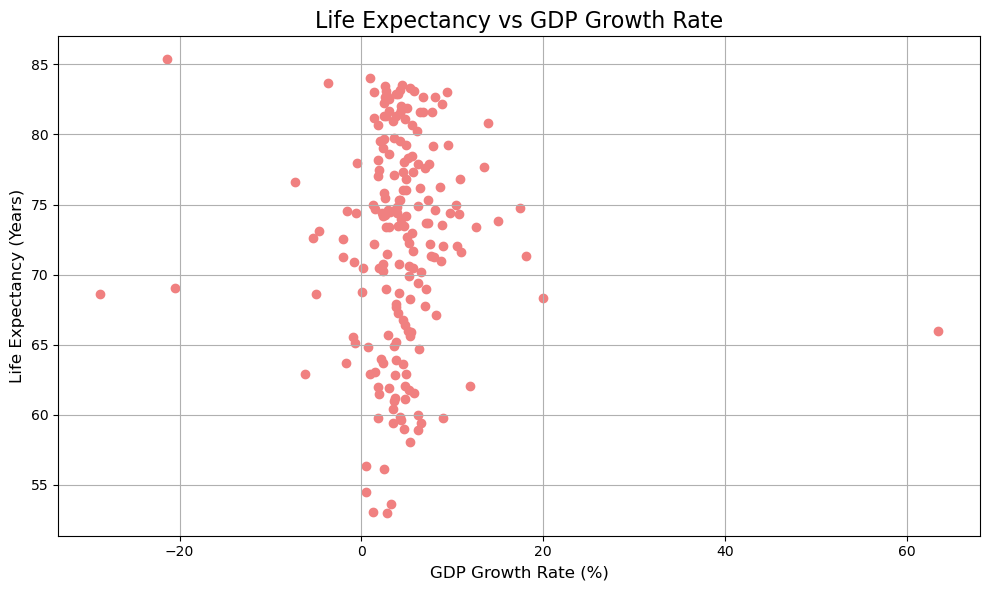

In [5]:
#| echo: true
#| eval: true
#| label: corr_plot
#| fig-cap: The scatter plot shows the relationship between life expectancy and GDP growth rate across different countries.
plt.figure(figsize=(10, 6))
plt.scatter(data['gdp_growth_rate'], data['life_expectancy'], color='lightcoral')
plt.title('Life Expectancy vs GDP Growth Rate', fontsize=16)
plt.xlabel('GDP Growth Rate (%)', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('le_gdp.png')
plt.show()




### Fastest Growing Countries by GDP

In this section, we focus on the top 10 countries experiencing the highest GDP growth rates, as displayed in the bar chart. These nations may exhibit favorable conditions for economic development, such as political stability, foreign direct investment, and growing industrial sectors, or are recovering from an economic recession.

The rapid economic growth observed in a select few countries often results from unique sets of policy choices, demographic changes, or external conditions. Research by Rodrik (2004) [@269651] emphasizes that growth accelerations are typically caused by large-scale policy shifts, including trade liberalization, investment in human capital, and improvements in institutional quality.

This chart offers a comparative snapshot of how different countries perform relative to each other. Investors and policymakers alike might be particularly interested in these economies as potential markets for expansion or trade, as their growth far outpaces the global average.


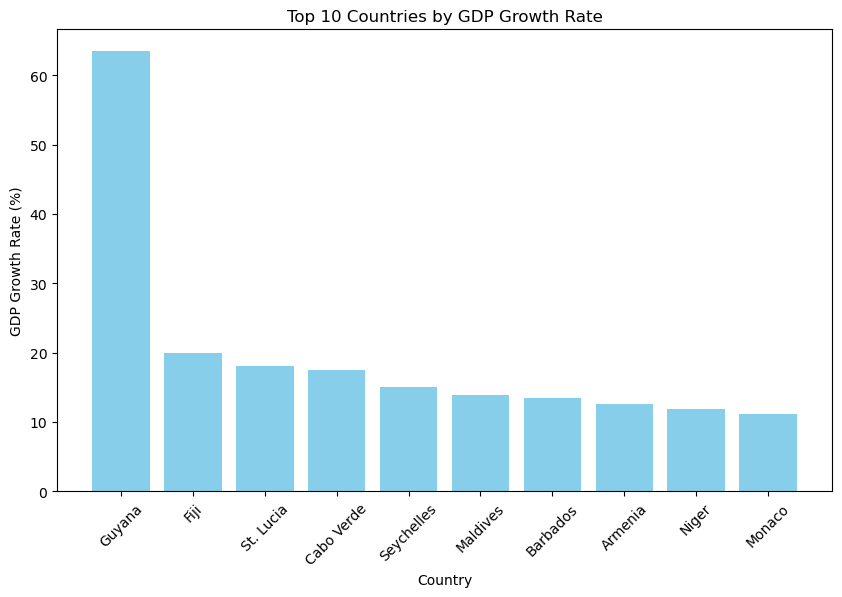

In [6]:
#| echo: true
#| eval: true
#| label: fast_plot
#| fig-cap: Bar chart of the top 10 Countries by GDP Growth Rate
top_countries = data.nlargest(10, 'gdp_growth_rate')[['country', 'gdp_growth_rate']]
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['gdp_growth_rate'], color='skyblue')
plt.title('Top 10 Countries by GDP Growth Rate')
plt.xlabel('Country')
plt.ylabel('GDP Growth Rate (%)')
plt.xticks(rotation=45)

plt.savefig('top_gdp_countries.png')
plt.show()



## Data Table

The final table in this notebook summarizes key statistics for three important indicators: inflation rate, GDP growth rate, and life expectancy. Each indicator's mean, minimum, maximum, and standard deviation are calculated, offering a concise overview of global economic and social health.

This summary table reinforces some of the observations made in earlier sections. For instance, the large standard deviation in the inflation rate and GDP growth rate emphasizes global disparities in economic performance. Meanwhile, life expectancy tends to be less variable, reflecting general improvements in healthcare and living standards across most countries. The information here serves as a benchmark for economists and development experts to monitor these indicators over time.

In [7]:
#| echo: true
#| eval: true
#| label: data_tbl
#| tbl-cap: Noteworthy statistics from the indicators
summary_stats = pd.DataFrame({
"Indicator": ["Inflation Rate", "GDP Growth Rate", "Life Expectancy"],
"Mean": [inflation_stats['mean'], gdp_growth_stats['mean'], life_expectancy_stats['mean']],
"Min": [inflation_stats['min'], gdp_growth_stats['min'], life_expectancy_stats['min']],
"Max": [inflation_stats['max'], gdp_growth_stats['max'], life_expectancy_stats['max']],
"Std Dev": [inflation_stats['std'], gdp_growth_stats['std'], life_expectancy_stats['std']]
})

summary_stats

,Indicator,Mean,Min,Max,Std Dev
0,Inflation Rate,12.493936,-6.687321,171.205491,19.682433
1,GDP Growth Rate,4.368901,-28.758591,63.439864,6.626811
2,Life Expectancy,72.416519,52.997000,85.377000,7.713322


## References


